# 1.データ準備

ローンデータ「av_loan_u6lujuX_CVtuZ9i.csv」を読み込み、正解ラベルを取得。

In [2]:
from IPython.core.display import display
import pandas as pd

# データの読み込み
df = pd.read_csv('./data/av_loan_u6lujuX_CVtuZ9i.csv', header=0)
X = df.iloc[:, 1:-1]
y = df.iloc[:, [-1]]

# 正解ラベルの数値数値変換
class_mapping = {'N':1, 'Y':0}
y = y.copy()
y.loc[:,'Loan_Status'] = y['Loan_Status'].map(class_mapping)

display(X.join(y).head())

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,1
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,0
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,0


- データはローン審査が通れば(0)、通らなかったら(1)

In [3]:
X.join(y).dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object

### 正解ラベルyに欠損値がないことを確認

In [4]:
# write your answer
print(y.isnull().sum())

Loan_Status    0
dtype: int64


### 特徴量Xをone-hotエンコーディング

In [5]:
# write your answer
X_ohe = pd.get_dummies(X, dummy_na=False, columns=[ 'Gender','Married','Dependents','Education','Self_Employed', 'Property_Area'])
display(X_ohe.head())

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,NaN,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1


### X_oheに含まれる欠損値を平均値で補完

In [6]:
# write your answer
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)

imp.fit(X_ohe)

X_fin_columns = X_ohe.columns.values
X_fin = pd.DataFrame(imp.transform(X_ohe), columns=X_fin_columns)
X_fin.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849.0,0.0,146.412162,360.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,4583.0,1508.0,128.000000,360.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,3000.0,0.0,66.000000,360.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,2583.0,2358.0,120.000000,360.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,6000.0,0.0,141.000000,360.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


### 前処理済み特徴量 X_fin と正解ラベル y を、交叉検証のためデータ分割

In [7]:
# write your answer
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_fin, y, test_size=0.20, random_state=0)

### パイプラインを構成
- 標準化とロジスティック回帰
- 標準化とランダムフォレスト
- 標準化と主成分分析とランダムフォレスト

In [8]:
# write your answer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

pipleine_lr = Pipeline([('scl', StandardScaler()),  ('est', LogisticRegression(random_state=1))])
pipleine_rf = Pipeline([('scl', StandardScaler()),  ('est', RandomForestClassifier(random_state=1))])
pipleine_pca_rf = Pipeline([('scl', StandardScaler()),  ('pca', PCA()), ('est', RandomForestClassifier(random_state=1))])

####  パイプラインの学習と評価、評価指標はf1スコア。

In [11]:
# write your answer
from sklearn.metrics import f1_score

pipleine_lr.fit(x_train, y_train.as_matrix().ravel())
print(f1_score(y_test.as_matrix().ravel(), pipleine_lr.predict(x_test)))
pipleine_rf.fit(x_train, y_train.as_matrix().ravel())
print(f1_score(y_test.as_matrix().ravel(), pipleine_rf.predict(x_test)))
pipleine_pca_rf.fit(x_train, y_train.as_matrix().ravel())
print(f1_score(y_test.as_matrix().ravel(), pipleine_pca_rf.predict(x_test)))

0.6
0.610169491525
0.5625


### グリッドサーチでロジスティック回帰パラメーターを調整
- 正則化：l1またはl2
- 正則化の強さ：0.1, 1.0. 10.0

In [9]:
# write your answer
from sklearn.grid_search import GridSearchCV
param_grid_logistic = {'est__C':[0.1,1.0,10.0], 'est__penalty':['l1','l2']}
clf = GridSearchCV(estimator=pipleine_lr, param_grid=param_grid_logistic, scoring='f1')

clf.fit(x_train, y_train.as_matrix().ravel())

/Users/takashi/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/takashi/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('est', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'est__C': [0.1, 1.0, 10.0], 'est__penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, scoring='f1', verbose=0)

### グリッドサーチで特定されたベストモデルを、検証用データで評価

In [12]:
# write your answer
print(f1_score(y_test.as_matrix().ravel(), clf.best_estimator_.predict(x_test)))

0.6


### X_finを標準化（Z変換）

In [15]:
# write your answer
sc = StandardScaler()
sc.fit(X_fin)
X_fin_std_columns = X_fin.columns.values
X_fin_std = pd.DataFrame(sc.transform(X_fin), columns=X_fin_std_columns)
X_fin_std.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.072991,-0.554487,0.000000,0.279851,0.45164,-0.472343,0.505592,1.372089,-1.357421,0.883012,-0.446339,-0.443713,-0.300975,0.528362,-0.528362,0.477493,-0.392601,-0.641478,-0.782016,1.428147
1,-0.134412,-0.038732,-0.219273,0.279851,0.45164,-0.472343,0.505592,-0.728816,0.736691,-1.132487,2.240448,-0.443713,-0.300975,0.528362,-0.528362,0.477493,-0.392601,1.558899,-0.782016,-0.700208
2,-0.393747,-0.554487,-0.957641,0.279851,0.45164,-0.472343,0.505592,-0.728816,0.736691,0.883012,-0.446339,-0.443713,-0.300975,0.528362,-0.528362,-2.094270,2.547117,-0.641478,-0.782016,1.428147
3,-0.462062,0.251980,-0.314547,0.279851,0.45164,-0.472343,0.505592,-0.728816,0.736691,0.883012,-0.446339,-0.443713,-0.300975,-1.892641,1.892641,0.477493,-0.392601,-0.641478,-0.782016,1.428147
4,0.097728,-0.554487,-0.064454,0.279851,0.45164,-0.472343,0.505592,1.372089,-1.357421,0.883012,-0.446339,-0.443713,-0.300975,0.528362,-0.528362,0.477493,-0.392601,-0.641478,-0.782016,1.428147


### X_fin_stdを対象にKMeansクラスタリングをした場合のクラスタ数を、2から10としてエルボー図を作成

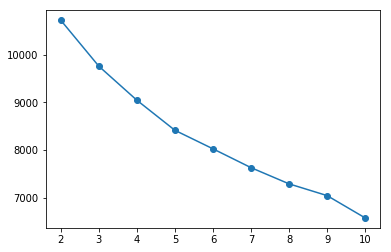

In [16]:
# write your answer
%matplotlib inline
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

distortions = []

for i in range(2,11):
    km=KMeans(n_clusters=i, random_state=0).fit(X_fin_std)
    distortions.append(km.inertia_)

plt.plot(range(2,11), distortions, marker='o')

### クラスタ数を3として、k-meansモデルを構築

In [17]:
# write your answer
km=KMeans(n_clusters=3, random_state=0)

### X_fin_stdの各データサンプルのクラスタ番号を推定し、結果をy_clusに設定 x_oheに結合

In [18]:
# write your answer
km.fit(X_fin_std)
y_clus = km.predict(X_fin_std)
X_ohe['cls'] = y_clus
X_ohe.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,cls
0,5849,0.0,NaN,360.0,1.0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,1,1
1,4583,1508.0,128.0,360.0,1.0,0,1,0,1,0,...,0,0,1,0,1,0,1,0,0,2
2,3000,0.0,66.0,360.0,1.0,0,1,0,1,1,...,0,0,1,0,0,1,0,0,1,2
3,2583,2358.0,120.0,360.0,1.0,0,1,0,1,1,...,0,0,0,1,1,0,0,0,1,0
4,6000,0.0,141.0,360.0,1.0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,1,1
